# KNN - Implementação do algoritmo K-vizinhos mais próximos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv("base_conhecimento.csv")
classificar = pd.read_csv("registros_para_classificar.csv")

In [3]:
def dist_euclidiana(a : list, b : list) -> float | None:
    if len(a) != len(b):
        return
    return (sum([(m - n)**2 for m, n in zip(a,b)])) * (1/2)

- Abaixo, a implementação do algoritmo KNN

In [4]:
def k_vizinhos_proximos(base, classificacao, k) -> list:
    base_tratada = base.drop(columns=["Species"]).values

    classes = []
    for registro in range(len(classificacao)):
        distancias = [dist_euclidiana(classificacao.iloc[registro], a) for a in base_tratada]
        distancias = pd.DataFrame(distancias)
        distancias.columns = ["Values"]
        k_vizinhos = distancias.sort_values(by="Values").head(k)

        counter = {rotulo : 0 for rotulo in base["Species"].unique().tolist()}
        for index in k_vizinhos.index:
            rotulo = base.iloc[index]["Species"]
            counter[rotulo] += 1

        maior_ocorrencia = max(counter.values())
        repetidos = [rotulo for rotulo, qtd in counter.items() if qtd == maior_ocorrencia]

        if len(repetidos) > 1:
            ordenados = distancias.sort_values(by="Values", ascending=False).head(k)
            for index in ordenados.index:
                rotulo = base.iloc[index]["Species"]
                if counter[rotulo] == maior_ocorrencia:
                    classes.append(rotulo)
                    break
        else:
            classes.append(repetidos[0])

    return classes    

- Abaixo, uma função que verifica cada possibilidade de k com a resposta ideal em _respostas-em-ordem.csv_

In [5]:
def calcula_erros(base, classificacao):
    respostas = pd.read_csv("respostas_em_ordem.csv")

    erros = []
    for k in range(1, len(base)):
        classes = k_vizinhos_proximos(base, classificacao, k)

        erro = 0
        for n in range(len(classes)):
            if classes[n] != respostas["Species"][n]:
                erro += 1

        erros.append(erro)

    return erros

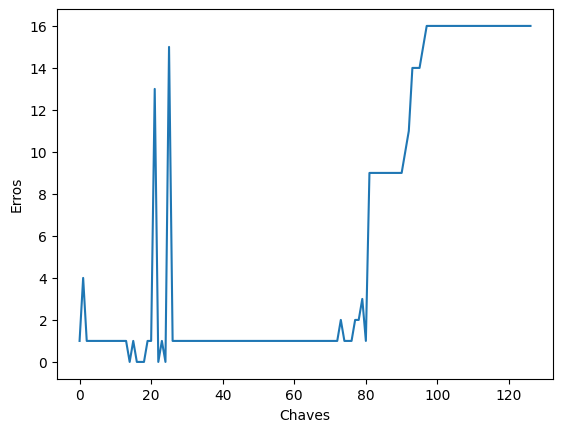

In [6]:
erros = calcula_erros(base, classificar)

plt.plot(erros)
plt.ylabel("Erros")
plt.xlabel("Chaves")
plt.show()

- Abaixo, é tomado o valor com menos erros e cria um csv, mostrando suas respostas.

In [7]:
def main():
    menor_erro = calcula_erros(base, classificar)
    menor_erro = menor_erro.index(min(menor_erro)) + 1
    classificacao = k_vizinhos_proximos(base, classificar, menor_erro)
    classificacao = pd.DataFrame(classificacao)
    classificacao.columns = ["Species"]
    classificacao.to_csv(f"melhor_classificacao_k{menor_erro}.csv")

if __name__ == "__main__":
    main()